## Nava Services 2022 Anlysis

In [1]:
# data manipulaton
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)

### Import Dataset

In [2]:
nava=pd.read_csv('Nava_Services_Changes_2022.csv')
nava

Timestamp        Date        Day  Current Value  Changes in ₹  \
0    04/01/2022 20:57:10  01/01/2022   Saturday       16237.25          0.00   
1    04/01/2022 21:01:22  02/01/2022     Sunday       16237.25          0.00   
2    04/01/2022 21:05:50  03/01/2022     Monday       16474.40        237.16   
3    05/01/2022 06:43:53  04/01/2022    Tuesday       16563.52         89.12   
4    06/01/2022 08:39:32  05/01/2022  Wednesday       16691.80        128.29   
..                   ...         ...        ...            ...           ...   
360  28/12/2022 15:24:06  27/12/2022    Tuesday       29747.05        264.53   
361  29/12/2022 15:58:05  28/12/2022  Wednesday       29749.16          2.11   
362  30/12/2022 12:25:46  29/12/2022   Thursday       29851.25        102.10   
363  04/01/2023 23:24:20  30/12/2022     Friday       29978.84       -127.59   
364  04/01/2023 23:25:38  31/12/2022   Saturday       29978.84          0.00   

     Changes in %  
0            0.00  
1            0.00  
2            1.46  
3            0.54  
4            0.77  
..            ...  
360          0.90  
361          0.01  
362          0.34  
363         -0.42  
364          0.00  

[365 rows x 6 columns]

In [3]:
nava.shape

(365, 6)

In [4]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Indicator(
    mode="number",
    value = nava.shape[0],
    number={'font':{'color':'#d8eb07','size':100}},
    delta={"reference":600},
    title={"text":"Rows <br><span style=" "'font-size:0.7em;color:gray'>in the dataset</span>"},
    domain = {'y':[0.7,1],'x':[0,0.5]}
))

fig.add_trace(go.Indicator(
    mode="number",
    value = nava.shape[1],
    number={'font':{'color':'#ee6868','size':100}},
    delta={"reference":600},
    title={"text":"Columns <br><span style=" "'font-size:0.7em;color:gray'>in the dataset</span>"},
    domain = {'y':[0,0.3],'x':[0.5,1]}
))

fig.show()

In [5]:
nava.head()


Timestamp        Date        Day  Current Value  Changes in ₹  \
0  04/01/2022 20:57:10  01/01/2022   Saturday       16237.25          0.00   
1  04/01/2022 21:01:22  02/01/2022     Sunday       16237.25          0.00   
2  04/01/2022 21:05:50  03/01/2022     Monday       16474.40        237.16   
3  05/01/2022 06:43:53  04/01/2022    Tuesday       16563.52         89.12   
4  06/01/2022 08:39:32  05/01/2022  Wednesday       16691.80        128.29   

   Changes in %  
0          0.00  
1          0.00  
2          1.46  
3          0.54  
4          0.77

In [6]:
nava.tail()

Timestamp        Date        Day  Current Value  Changes in ₹  \
360  28/12/2022 15:24:06  27/12/2022    Tuesday       29747.05        264.53   
361  29/12/2022 15:58:05  28/12/2022  Wednesday       29749.16          2.11   
362  30/12/2022 12:25:46  29/12/2022   Thursday       29851.25        102.10   
363  04/01/2023 23:24:20  30/12/2022     Friday       29978.84       -127.59   
364  04/01/2023 23:25:38  31/12/2022   Saturday       29978.84          0.00   

     Changes in %  
360          0.90  
361          0.01  
362          0.34  
363         -0.42  
364          0.00

#### **Dropping Columns** : To drop columns with respect to their name.

In [7]:
# Drop the Timestamp column
nava=nava.drop(labels='Timestamp',axis=1)
nava.head()

Date        Day  Current Value  Changes in ₹  Changes in %
0  01/01/2022   Saturday       16237.25          0.00          0.00
1  02/01/2022     Sunday       16237.25          0.00          0.00
2  03/01/2022     Monday       16474.40        237.16          1.46
3  04/01/2022    Tuesday       16563.52         89.12          0.54
4  05/01/2022  Wednesday       16691.80        128.29          0.77

#### Rename specific columns

In [8]:
nava.rename(columns = {'Date':'date','Day':'day','Current Value':'current_value',
                    'Changes in ₹':'changes_in_value','Changes in %':'changes_in_percent'},
          inplace = True)

In [9]:
nava.head()

date        day  current_value  changes_in_value  changes_in_percent
0  01/01/2022   Saturday       16237.25              0.00                0.00
1  02/01/2022     Sunday       16237.25              0.00                0.00
2  03/01/2022     Monday       16474.40            237.16                1.46
3  04/01/2022    Tuesday       16563.52             89.12                0.54
4  05/01/2022  Wednesday       16691.80            128.29                0.77

In [10]:
#describe():To check the basic description of a datafrme.
nava.describe()

current_value  changes_in_value  changes_in_percent
count     365.000000        365.000000          365.000000
mean    22876.243178          2.783890            0.009893
std      4471.492786        213.641166            1.001782
min     15655.310000       -926.590000           -5.370000
25%     19440.590000        -31.810000           -0.170000
50%     21204.980000          0.000000            0.000000
75%     27040.050000        102.100000            0.480000
max     30656.870000        631.640000            3.750000

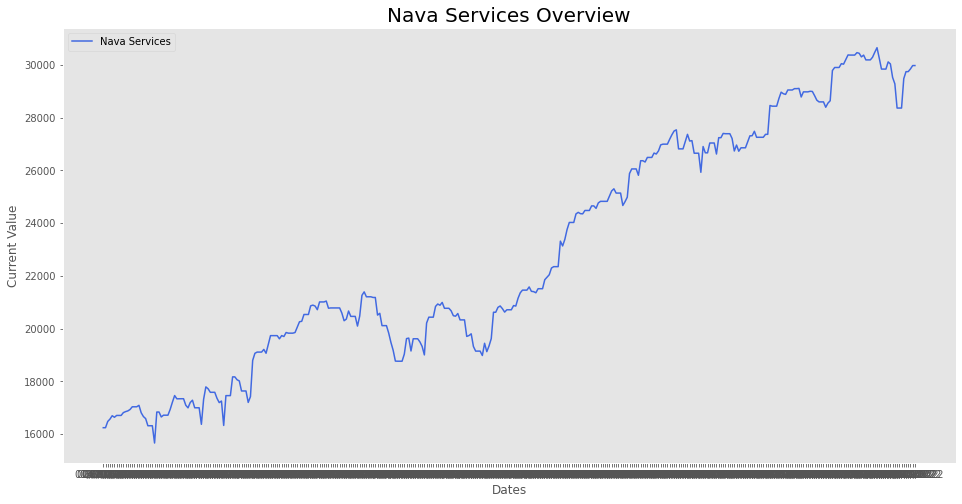

In [11]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=nava["date"]
y=nava["current_value"]
plt.plot(x,y,color='royalblue',linestyle='solid',label="Nava Services")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xlabel("Dates")
plt.ylabel("Current Value")
plt.title('Nava Services Overview',fontsize=20)
plt.grid()
plt.legend()
plt.show()

#### Nava Services 36 Week High

In [12]:
nava.iloc[nava['current_value'].idxmax()]

date                  14/12/2022
day                    Wednesday
current_value           30656.87
changes_in_value           172.3
changes_in_percent          0.56
Name: 347, dtype: object

#### Nava Services 36 Week Low

In [13]:
nava.iloc[nava['current_value'].idxmin()]

date                  24/01/2022
day                       Monday
current_value           15655.31
changes_in_value          -655.9
changes_in_percent         -4.02
Name: 23, dtype: object

In [14]:
nava['day'].value_counts()

Saturday     53
Sunday       52
Monday       52
Tuesday      52
Wednesday    52
Thursday     52
Friday       52
Name: day, dtype: int64

In [15]:
import plotly.graph_objects as go

labels = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
values = [37,37,36,36,36,36,36]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=values,
    width=[0.7, 0.7, 0.7, 0.7, 0.7,0.7,0.7], # customize width here
    name='Primary Product',
    marker_color='darkorange'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Day count 2022')
fig.show()

### **Pandas Functions**

*   Mean
*   Min
*   Median
*   Maximum

In [16]:
nava.mean()

C:\Users\navna\AppData\Local\Temp\ipykernel_20156\386268991.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



current_value         22876.243178
changes_in_value          2.783890
changes_in_percent        0.009893
dtype: float64

In [17]:
nava.min()

date                  01/01/2022
day                       Friday
current_value           15655.31
changes_in_value         -926.59
changes_in_percent         -5.37
dtype: object

In [18]:
nava.max()

date                  31/12/2022
day                    Wednesday
current_value           30656.87
changes_in_value          631.64
changes_in_percent          3.75
dtype: object

In [19]:
nava.median()

C:\Users\navna\AppData\Local\Temp\ipykernel_20156\2899039549.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



current_value         21204.98
changes_in_value          0.00
changes_in_percent        0.00
dtype: float64

#### January Market Update

In [20]:
jan_nava=nava.iloc[0:31]
jan_nava.head()

date        day  current_value  changes_in_value  changes_in_percent
0  01/01/2022   Saturday       16237.25              0.00                0.00
1  02/01/2022     Sunday       16237.25              0.00                0.00
2  03/01/2022     Monday       16474.40            237.16                1.46
3  04/01/2022    Tuesday       16563.52             89.12                0.54
4  05/01/2022  Wednesday       16691.80            128.29                0.77

In [21]:
jan_nava.describe()

current_value  changes_in_value  changes_in_percent
count      31.000000         31.000000           31.000000
mean    16664.267419         -9.849355           -0.059355
std       301.046505        167.848902            1.017008
min     15655.310000       -655.900000           -4.020000
25%     16572.870000          0.000000            0.000000
50%     16702.490000          0.000000            0.000000
75%     16839.645000         68.330000            0.410000
max     17086.130000        237.160000            1.460000

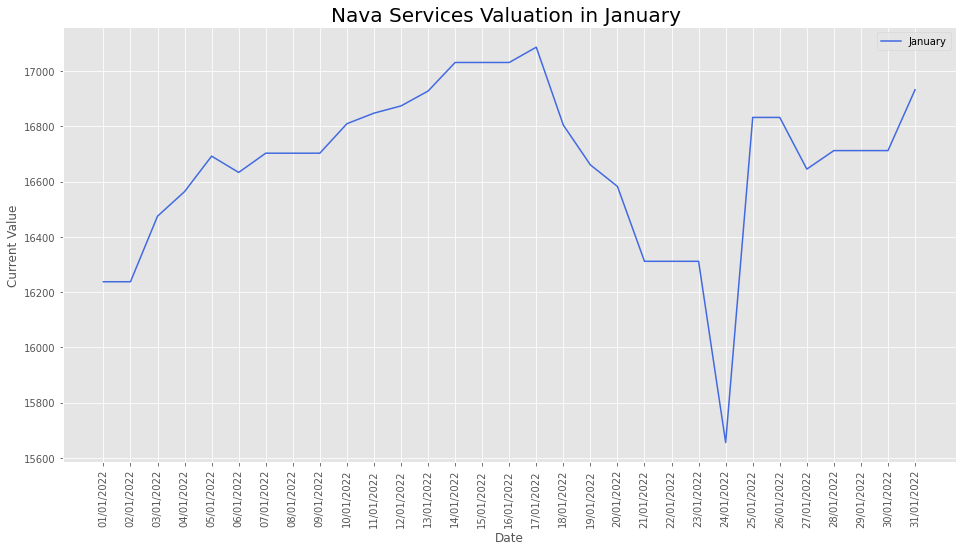

In [22]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=jan_nava["date"]
y=jan_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="January")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation in January ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

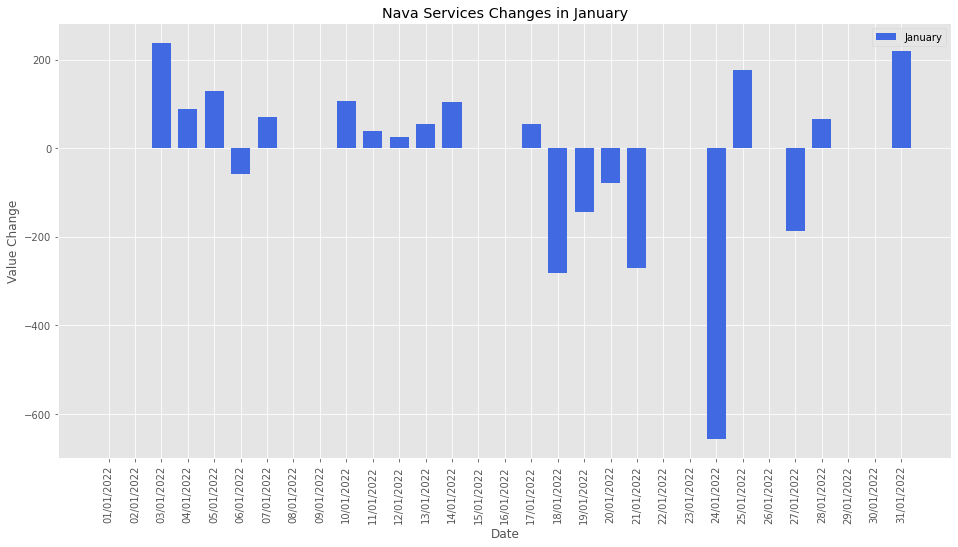

In [23]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=jan_nava["date"]
y=jan_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="January")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Nava Services Changes in January')
plt.legend()
plt.show()

<AxesSubplot:xlabel='changes_in_value'>

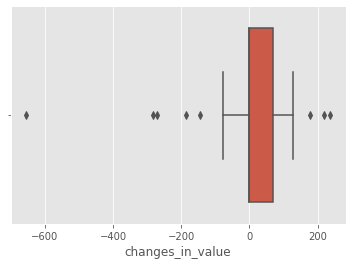

In [24]:
sns.boxplot(x=jan_nava['changes_in_value'])

<AxesSubplot:xlabel='changes_in_percent'>

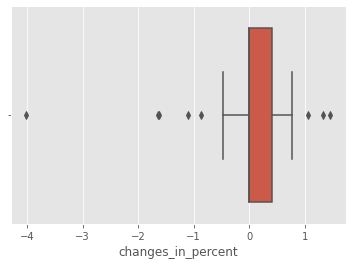

In [25]:
sns.boxplot(x=jan_nava['changes_in_percent'])

In [26]:
jan_nava['day'].value_counts()

Saturday     5
Sunday       5
Monday       5
Tuesday      4
Wednesday    4
Thursday     4
Friday       4
Name: day, dtype: int64

#### February Market Update

In [27]:
feb_nava=nava.iloc[31:59]
feb_nava.head()

date        day  current_value  changes_in_value  changes_in_percent
31  01/02/2022    Tuesday       17204.97            272.96                1.61
32  02/02/2022  Wednesday       17456.58            251.61                1.46
33  03/02/2022   Thursday       17333.10           -123.48               -0.71
34  04/02/2022     Friday       17336.29              3.19                0.02
35  05/02/2022   Saturday       17336.29              0.00                0.00

In [28]:
feb_nava.describe()

current_value  changes_in_value  changes_in_percent
count      28.000000         28.000000           28.000000
mean    17289.429643        -27.998929           -0.152857
std       374.262925        294.015462            1.724198
min     16322.630000       -926.590000           -5.370000
25%     17164.585000       -126.362500           -0.722500
50%     17334.695000          0.000000            0.000000
75%     17454.765000         66.490000            0.387500
max     18165.900000        631.640000            3.750000

In [29]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=feb_nava["date"]
y=feb_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="February")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation in February ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

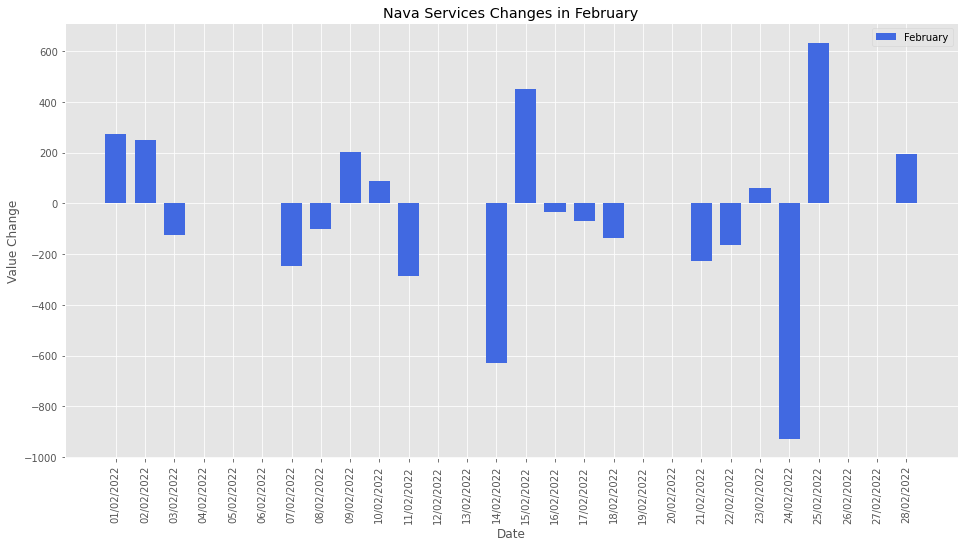

In [30]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=feb_nava["date"]
y=feb_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="February")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Nava Services Changes in February')
plt.legend()
plt.show()

In [31]:
sns.boxplot(x=feb_nava['changes_in_value'])

<AxesSubplot:xlabel='changes_in_value'>

<AxesSubplot:xlabel='changes_in_percent'>

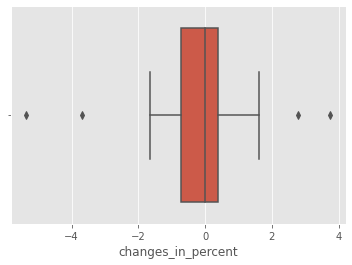

In [32]:
sns.boxplot(x=feb_nava['changes_in_percent'])

In [33]:
feb_nava['day'].value_counts()

Tuesday      4
Wednesday    4
Thursday     4
Friday       4
Saturday     4
Sunday       4
Monday       4
Name: day, dtype: int64

#### March Market Update

In [34]:
march_nava=nava.iloc[59:90]
march_nava.head()

date        day  current_value  changes_in_value  changes_in_percent
59  01/03/2022    Tuesday       18165.90              0.00                0.00
60  02/03/2022  Wednesday       18056.37           -109.37               -0.60
61  03/03/2022   Thursday       18012.17            -44.36               -0.25
62  04/03/2022     Friday       17630.95           -381.22               -2.12
63  05/03/2022   Saturday       17630.95              0.00                0.00

In [35]:
march_nava.describe()

current_value  changes_in_value  changes_in_percent
count      31.000000         31.000000           31.000000
mean    19106.504839         35.746129            0.178710
std       916.769230        179.453031            0.972672
min     17196.300000       -434.640000           -2.470000
25%     18478.625000        -12.490000           -0.065000
50%     19399.120000          0.000000            0.000000
75%     19778.360000        137.320000            0.700000
max     20274.060000        374.770000            2.040000

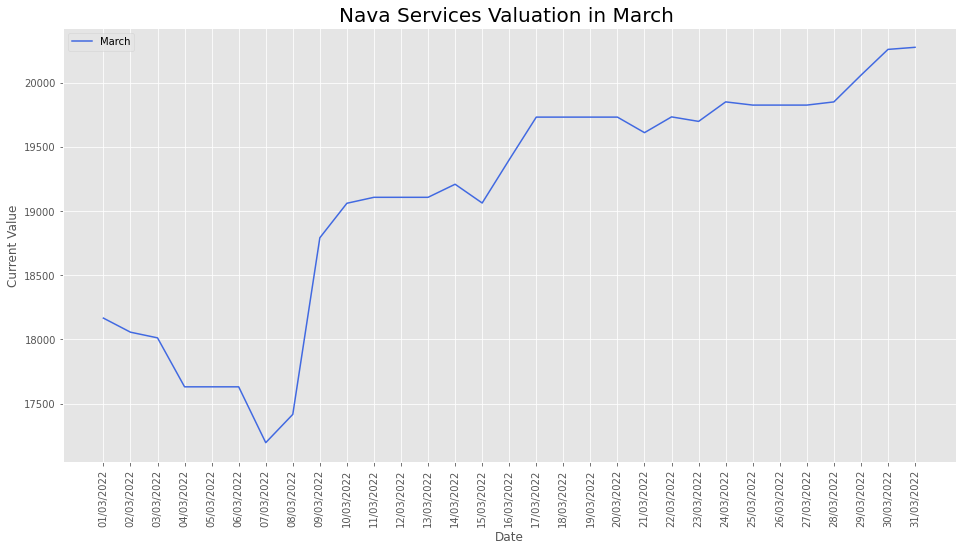

In [36]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=march_nava["date"]
y=march_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="March")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation in March ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

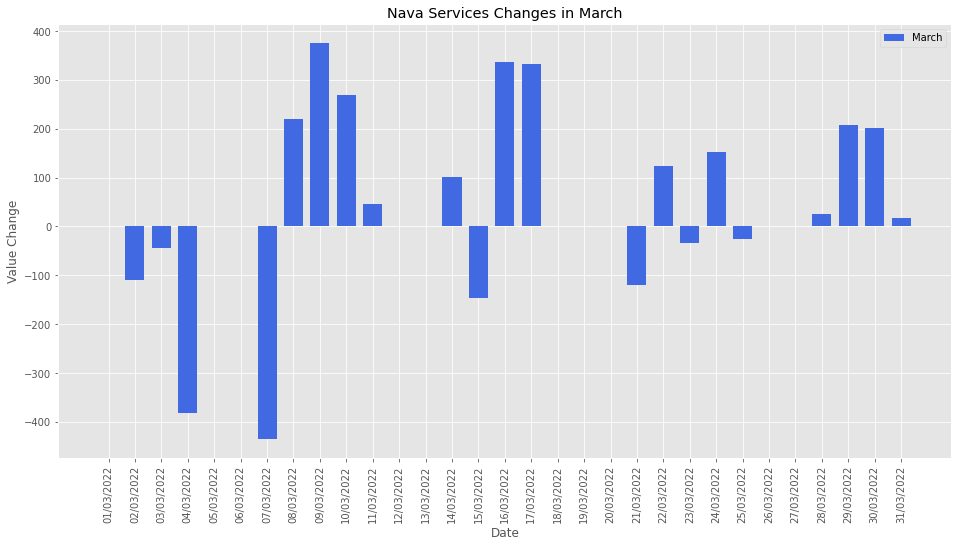

In [37]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=march_nava["date"]
y=march_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="March")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Nava Services Changes in March')
plt.legend()
plt.show()

<AxesSubplot:xlabel='changes_in_value'>

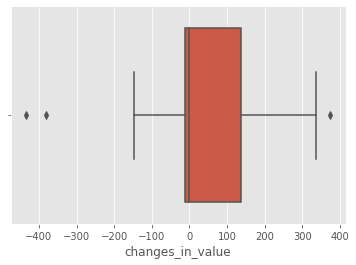

In [38]:
sns.boxplot(x=march_nava['changes_in_value'])

<AxesSubplot:xlabel='changes_in_percent'>

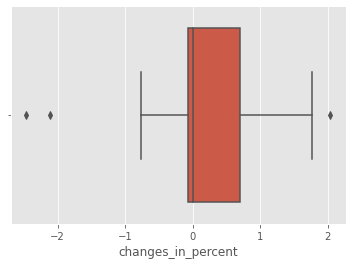

In [39]:
sns.boxplot(x=march_nava['changes_in_percent'])

In [40]:
march_nava['day'].value_counts()

Tuesday      5
Wednesday    5
Thursday     5
Friday       4
Saturday     4
Sunday       4
Monday       4
Name: day, dtype: int64

#### April Market Update

In [41]:
april_nava=nava.iloc[90:120]
april_nava.head()

date       day  current_value  changes_in_value  changes_in_percent
90  01/04/2022    Friday       20533.12            259.06                1.28
91  02/04/2022  Saturday       20533.12              0.00                0.00
92  03/04/2022    Sunday       20533.12              0.00                0.00
93  04/04/2022    Monday       20860.78            327.65                1.60
94  05/04/2022   Tuesday       20888.28             27.50                0.13

In [42]:
april_nava.describe()

current_value  changes_in_value  changes_in_percent
count      30.000000         30.000000           30.000000
mean    20752.648333         -2.920667           -0.008333
std       305.864996        186.219050            0.904743
min     20093.250000       -367.670000           -1.800000
25%     20533.120000       -112.222500           -0.537500
50%     20781.600000          0.000000            0.000000
75%     20978.985000         32.120000            0.152500
max     21391.540000        380.230000            1.890000

In [43]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=april_nava["date"]
y=april_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="April")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation in April ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

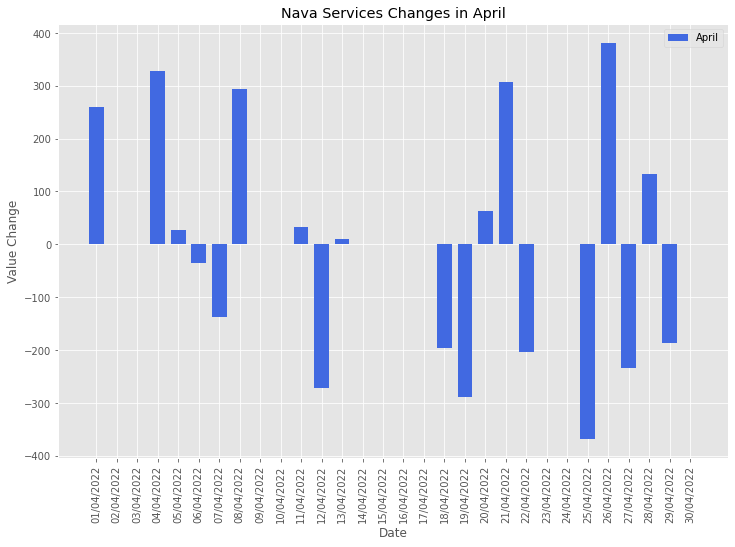

In [44]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=april_nava["date"]
y=april_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="April")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Nava Services Changes in April')
plt.legend()
plt.show()

<AxesSubplot:xlabel='changes_in_value'>

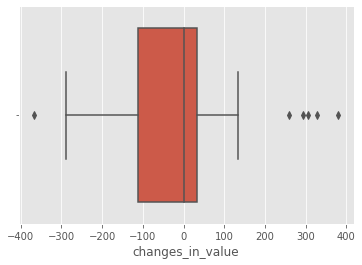

In [45]:
sns.boxplot(x=april_nava['changes_in_value'])

In [46]:
sns.boxplot(x=april_nava['changes_in_percent'])

<AxesSubplot:xlabel='changes_in_percent'>

In [47]:
april_nava['day'].value_counts()

Friday       5
Saturday     5
Sunday       4
Monday       4
Tuesday      4
Wednesday    4
Thursday     4
Name: day, dtype: int64

#### May Market Update

In [48]:
may_nava=nava.iloc[120:151]
may_nava.head()

date        day  current_value  changes_in_value  \
120  01/05/2022     Sunday       21204.98              0.00   
121  02/05/2022     Monday       21178.60            -26.39   
122  03/05/2022    Tuesday       21178.60              0.00   
123  04/05/2022  Wednesday       20509.68           -668.91   
124  05/05/2022   Thursday       20578.84             69.16   

     changes_in_percent  
120                0.00  
121               -0.12  
122                0.00  
123               -3.16  
124                0.34

In [49]:
may_nava.describe()

current_value  changes_in_value  changes_in_percent
count      31.000000         31.000000           31.000000
mean    19866.214839        -40.568387           -0.197419
std       768.626586        281.789395            1.417521
min     18759.980000       -668.910000           -3.160000
25%     19247.900000       -226.795000           -1.140000
50%     19637.150000          0.000000            0.000000
75%     20430.830000         43.955000            0.220000
max     21204.980000        590.800000            3.100000

In [50]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=may_nava["date"]
y=may_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="May")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation in May ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

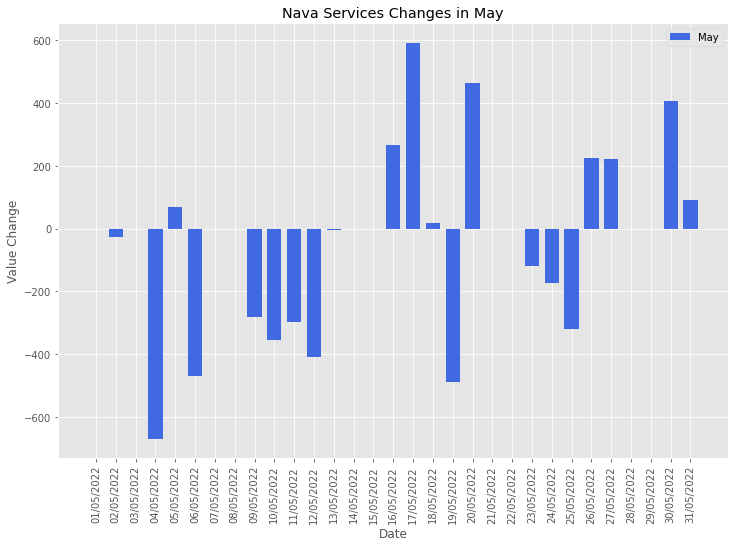

In [51]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=may_nava["date"]
y=may_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="May")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Nava Services Changes in May')
plt.legend()
plt.show()

In [52]:
sns.boxplot(x=may_nava['changes_in_value'])

<AxesSubplot:xlabel='changes_in_value'>

<AxesSubplot:xlabel='changes_in_percent'>

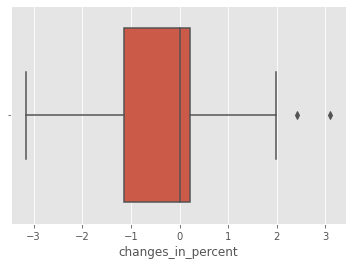

In [53]:
sns.boxplot(x=may_nava['changes_in_percent'])

In [54]:
may_nava['day'].value_counts()

Sunday       5
Monday       5
Tuesday      5
Wednesday    4
Thursday     4
Friday       4
Saturday     4
Name: day, dtype: int64

#### June Market Update

In [55]:
june_nava=nava.iloc[151:181]
june_nava.head()

date        day  current_value  changes_in_value  \
151  01/06/2022  Wednesday       20883.28            -47.72   
152  02/06/2022   Thursday       20991.24            107.97   
153  03/06/2022     Friday       20768.72           -222.52   
154  04/06/2022   Saturday       20768.72              0.00   
155  05/06/2022     Sunday       20768.72              0.00   

     changes_in_percent  
151               -0.23  
152                0.52  
153               -1.06  
154                0.00  
155                0.00

In [56]:
june_nava.describe()

current_value  changes_in_value  changes_in_percent
count      30.000000         30.000000           30.000000
mean    20137.302333        -43.567333           -0.209667
std       674.820562        212.793982            1.073520
min     18976.980000       -626.660000           -3.080000
25%     19485.050000       -157.287500           -0.810000
50%     20398.490000          0.000000            0.000000
75%     20733.467500         47.432500            0.227500
max     20991.240000        463.600000            2.440000

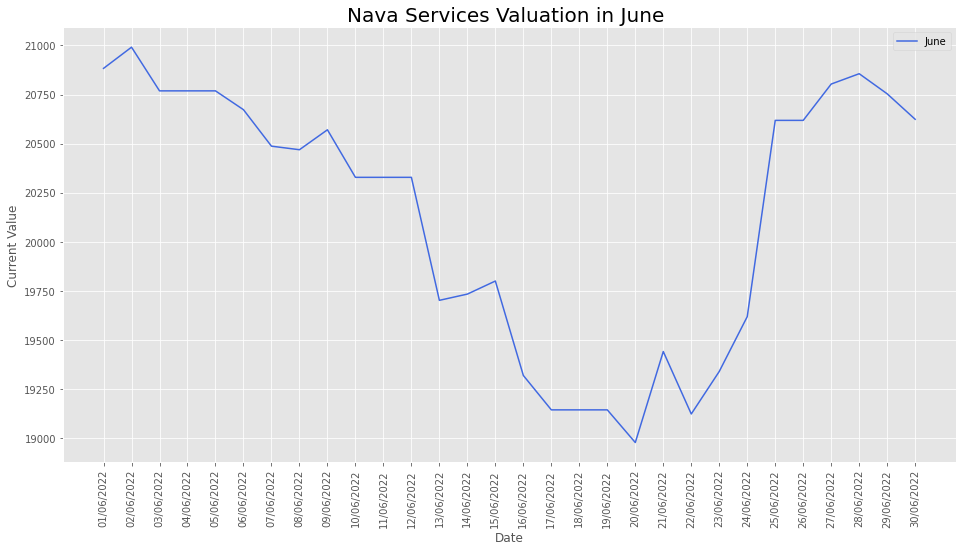

In [57]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=june_nava["date"]
y=june_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="June")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation in June ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

In [58]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=june_nava["date"]
y=june_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="June")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Nava Services Changes in June')
plt.legend()
plt.show()

In [59]:
sns.boxplot(x=june_nava['changes_in_value'])

<AxesSubplot:xlabel='changes_in_value'>

<AxesSubplot:xlabel='changes_in_percent'>

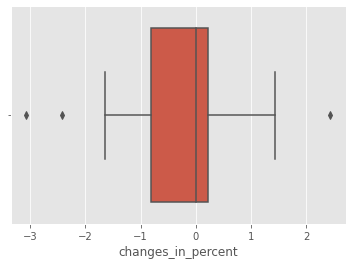

In [60]:
sns.boxplot(x=june_nava['changes_in_percent'])

In [61]:
june_nava['day'].value_counts()

Wednesday    5
Thursday     5
Friday       4
Saturday     4
Sunday       4
Monday       4
Tuesday      4
Name: day, dtype: int64

#### July Market Update

In [62]:
july_nava=nava.iloc[181:212]
july_nava.head()

date       day  current_value  changes_in_value  changes_in_percent
181  01/07/2022    Friday       20711.55             87.65                0.42
182  02/07/2022  Saturday       20711.55              0.00                0.00
183  03/07/2022    Sunday       20711.55              0.00                0.00
184  04/07/2022    Monday       20871.24            159.69                0.77
185  05/07/2022   Tuesday       20852.81            -18.42               -0.09

In [63]:
july_nava.describe()

current_value  changes_in_value  changes_in_percent
count      31.000000         31.000000           31.000000
mean    21995.541290         77.459032            0.348387
std      1039.404069        137.418989            0.623672
min     20711.550000       -182.980000           -0.780000
25%     21378.620000          0.000000            0.000000
50%     21511.340000          0.000000            0.000000
75%     22347.810000        156.910000            0.745000
max     24025.110000        373.970000            1.600000

In [64]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=july_nava["date"]
y=july_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="July")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation for July ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

In [65]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=july_nava["date"]
y=july_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="Total Change")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Value Changes in July')
plt.legend()
plt.show()

<AxesSubplot:xlabel='changes_in_value'>

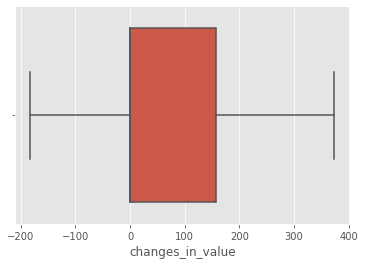

In [66]:
sns.boxplot(x=july_nava['changes_in_value'])

<AxesSubplot:xlabel='changes_in_percent'>

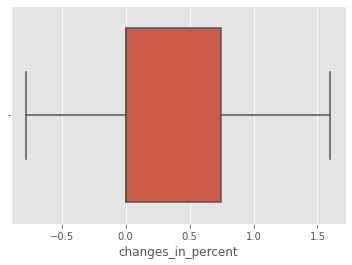

In [67]:
sns.boxplot(x=july_nava['changes_in_percent'])

In [68]:
july_nava['day'].value_counts()

Friday       5
Saturday     5
Sunday       5
Monday       4
Tuesday      4
Wednesday    4
Thursday     4
Name: day, dtype: int64

#### August Market Update

In [69]:
aug_nava=nava.iloc[212:243]
aug_nava.head()

date        day  current_value  changes_in_value  \
212  01/08/2022     Monday       24349.28            324.17   
213  02/08/2022    Tuesday       24407.89             58.61   
214  03/08/2022  Wednesday       24358.83            -49.06   
215  04/08/2022   Thursday       24351.61             -7.22   
216  05/08/2022     Friday       24480.25            128.64   

     changes_in_percent  
212                1.35  
213                0.24  
214               -0.20  
215               -0.03  
216                0.53

In [70]:
aug_nava.describe()

current_value  changes_in_value  changes_in_percent
count      31.000000         31.000000           31.000000
mean    25060.699355         43.178387            0.176129
std       626.785823        177.187840            0.701981
min     24349.280000       -470.950000           -1.870000
25%     24606.715000          0.000000            0.000000
50%     24826.290000          0.000000            0.000000
75%     25262.005000        157.750000            0.630000
max     26367.570000        552.400000            2.140000

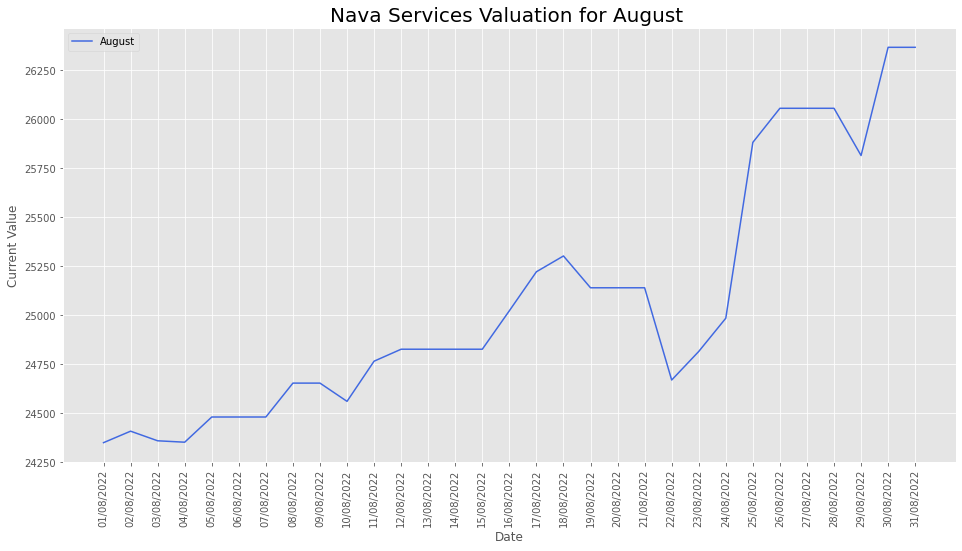

In [71]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=aug_nava["date"]
y=aug_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="August")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation for August ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

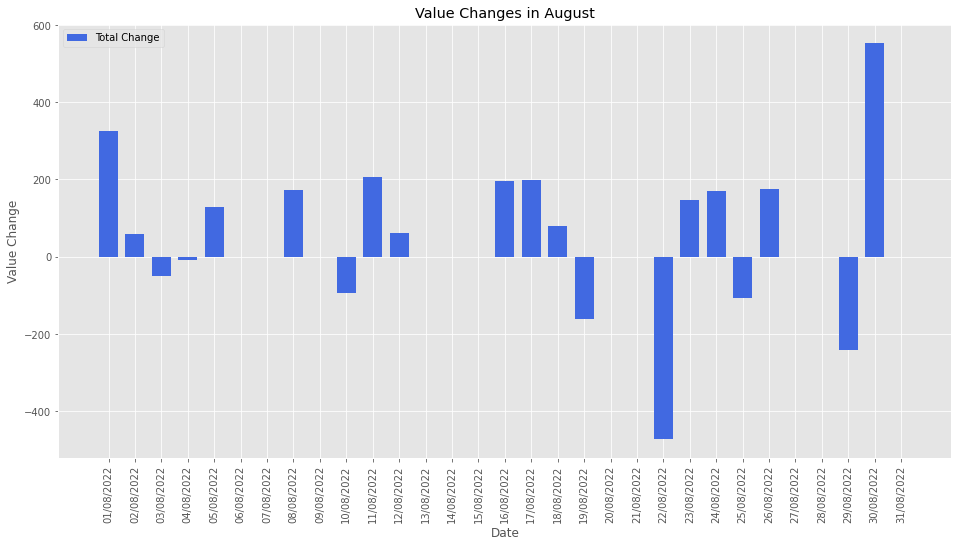

In [72]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=aug_nava["date"]
y=aug_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="Total Change")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Value Changes in August')
plt.legend()
plt.show()

<AxesSubplot:xlabel='changes_in_value'>

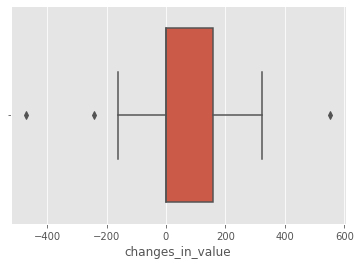

In [73]:
sns.boxplot(x=aug_nava['changes_in_value'])

<AxesSubplot:xlabel='changes_in_percent'>

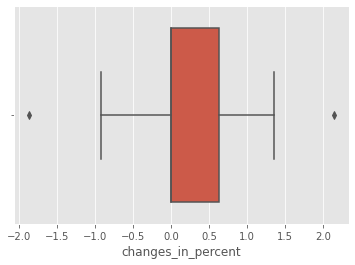

In [74]:
sns.boxplot(x=aug_nava['changes_in_percent'])

In [75]:
aug_nava['day'].value_counts()

Monday       5
Tuesday      5
Wednesday    5
Thursday     4
Friday       4
Saturday     4
Sunday       4
Name: day, dtype: int64

#### September Market Update

In [76]:
sept_nava=nava.iloc[243:273]
sept_nava.head()

date       day  current_value  changes_in_value  changes_in_percent
243  01/09/2022  Thursday       26318.97            -48.60               -0.18
244  02/09/2022    Friday       26492.45            173.48                0.66
245  03/09/2022  Saturday       26492.45              0.00                0.00
246  04/09/2022    Sunday       26492.45              0.00                0.00
247  05/09/2022    Monday       26657.90            165.44                0.62

In [77]:
sept_nava.describe()

current_value  changes_in_value  changes_in_percent
count      30.000000         30.000000           30.000000
mean    26855.403667        -10.940333           -0.037333
std       354.583611        255.884420            0.947330
min     25928.190000       -724.390000           -2.720000
25%     26652.580000        -17.332500           -0.060000
50%     26817.280000          0.000000            0.000000
75%     27075.382500        160.247500            0.597500
max     27539.620000        373.030000            1.400000

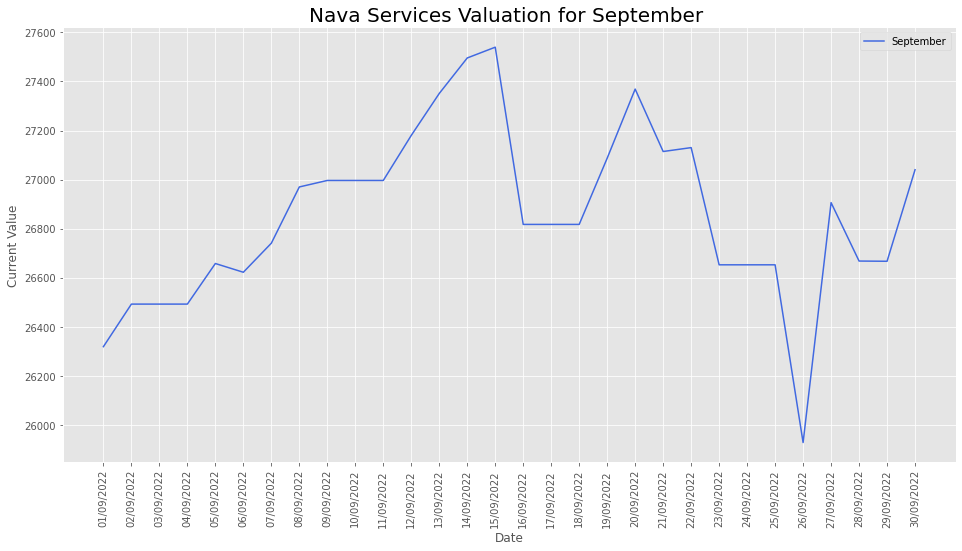

In [78]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=sept_nava["date"]
y=sept_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="September")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation for September ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

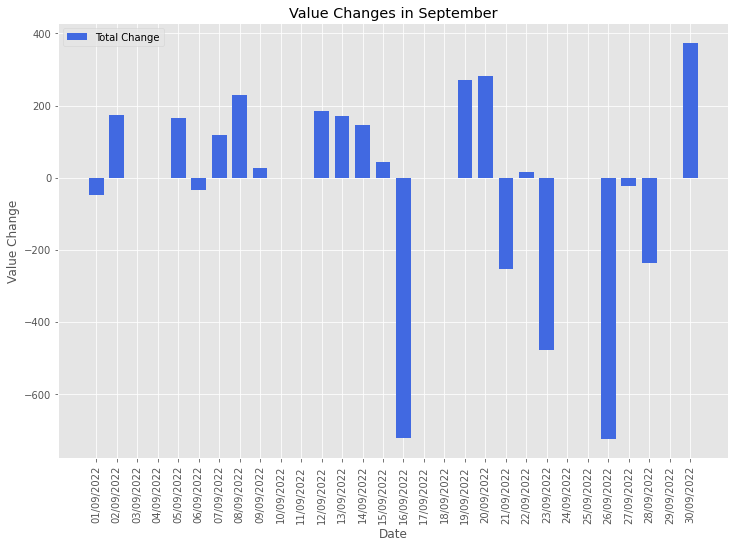

In [79]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=sept_nava["date"]
y=sept_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="Total Change")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Value Changes in September')
plt.legend()
plt.show()

<AxesSubplot:xlabel='changes_in_value'>

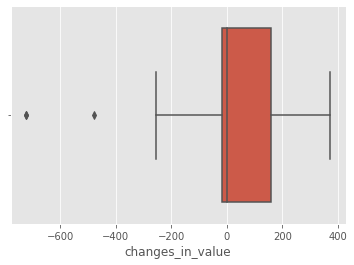

In [80]:
sns.boxplot(x=sept_nava['changes_in_value'])

<AxesSubplot:xlabel='changes_in_percent'>

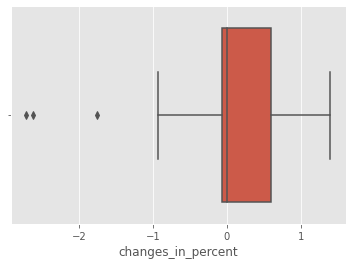

In [81]:
sns.boxplot(x=sept_nava['changes_in_percent'])

In [82]:
sept_nava['day'].value_counts()

Thursday     5
Friday       5
Saturday     4
Sunday       4
Monday       4
Tuesday      4
Wednesday    4
Name: day, dtype: int64

#### October Market Update

In [83]:
oct_nava=nava.iloc[273:304]
oct_nava.head()

date        day  current_value  changes_in_value  \
273  01/10/2022   Saturday       27040.05              0.00   
274  02/10/2022     Sunday       27040.05              0.00   
275  03/10/2022     Monday       26621.49           -418.56   
276  04/10/2022    Tuesday       27241.79            620.29   
277  05/10/2022  Wednesday       27241.79              0.00   

     changes_in_percent  
273                0.00  
274                0.00  
275               -1.55  
276                2.33  
277                0.00

In [84]:
oct_nava.describe()

current_value  changes_in_value  changes_in_percent
count      31.000000         31.000000           31.000000
mean    27369.194839         22.136452            0.082258
std       554.097139        203.433004            0.752825
min     26621.490000       -475.230000           -1.750000
25%     27040.050000          0.000000            0.000000
50%     27257.200000          0.000000            0.000000
75%     27392.600000        120.960000            0.450000
max     28726.260000        620.290000            2.330000

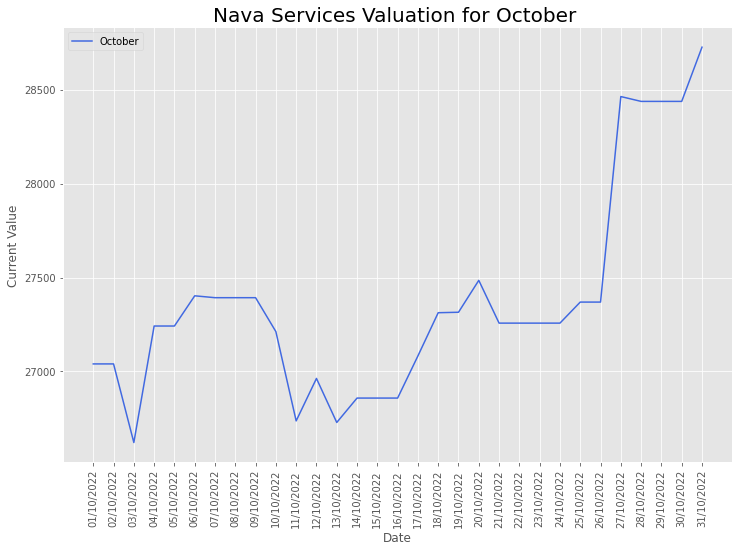

In [85]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=oct_nava["date"]
y=oct_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="October")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation for October ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

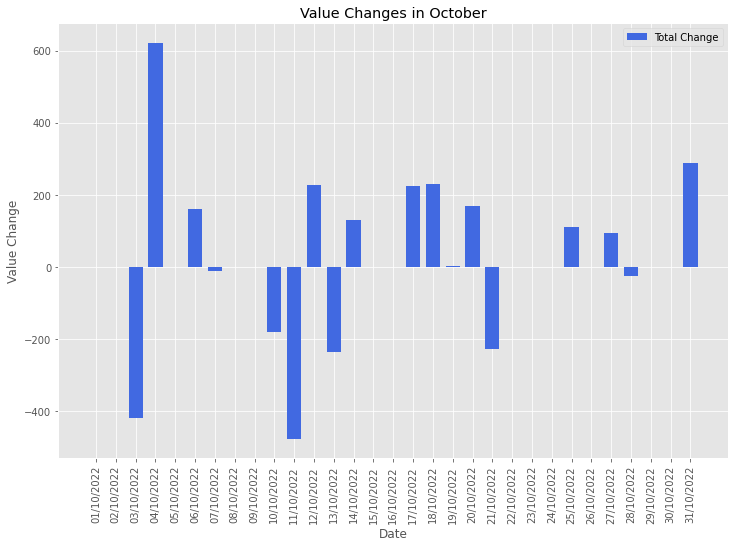

In [86]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=oct_nava["date"]
y=oct_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="Total Change")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Value Changes in October')
plt.legend()
plt.show()

<AxesSubplot:xlabel='changes_in_value'>

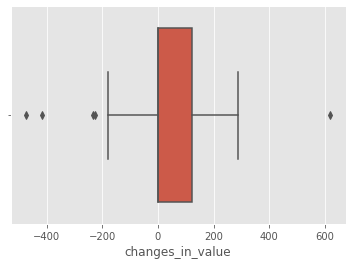

In [87]:
sns.boxplot(x=oct_nava['changes_in_value'])

<AxesSubplot:xlabel='changes_in_percent'>

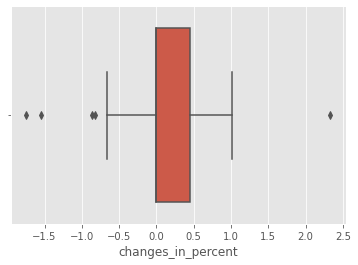

In [88]:
sns.boxplot(x=oct_nava['changes_in_percent'])

In [89]:
oct_nava['day'].value_counts()

Saturday     5
Sunday       5
Monday       5
Tuesday      4
Wednesday    4
Thursday     4
Friday       4
Name: day, dtype: int64

#### November Market Update

In [90]:
nov_nava=nava.iloc[304:334]
nov_nava.head()

date        day  current_value  changes_in_value  \
304  01/11/2022    Tuesday       28968.91            242.65   
305  02/11/2022  Wednesday       28909.64            -59.27   
306  03/11/2022   Thursday       28884.86            -24.78   
307  04/11/2022     Friday       29051.74            166.88   
308  05/11/2022   Saturday       29051.74              0.00   

     changes_in_percent  
304                0.84  
305               -0.20  
306               -0.09  
307                0.58  
308                0.00

In [91]:
nov_nava.describe()

current_value  changes_in_value  changes_in_percent
count      30.000000         30.000000           30.000000
mean    29121.731333         17.651000            0.060367
std       514.500274        124.680552            0.429452
min     28396.820000       -326.540000           -1.120000
25%     28798.842500        -15.100000           -0.050000
50%     28988.335000          0.000000            0.000000
75%     29109.945000        108.400000            0.370000
max     30204.420000        242.650000            0.840000

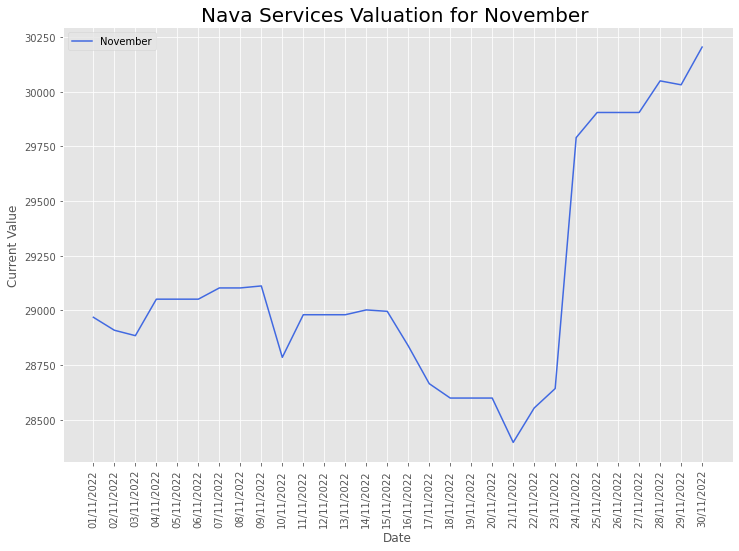

In [92]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=nov_nava["date"]
y=nov_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="November")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation for November ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

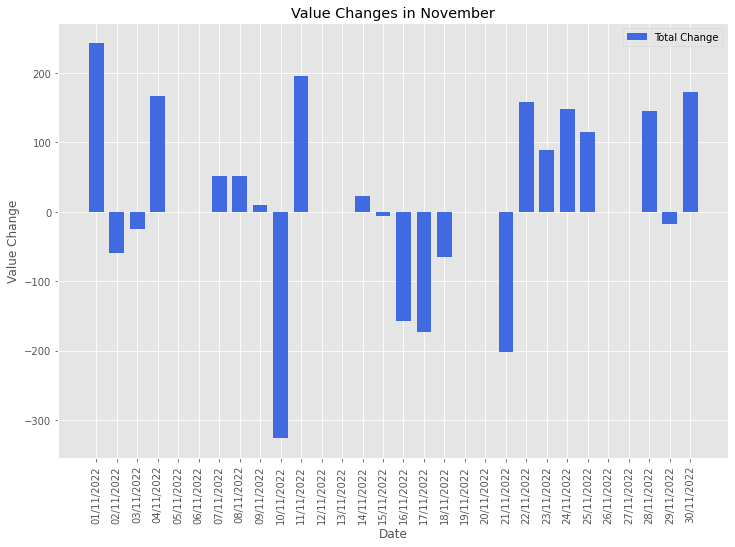

In [93]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=nov_nava["date"]
y=nov_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="Total Change")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Value Changes in November')
plt.legend()
plt.show()

<AxesSubplot:xlabel='changes_in_value'>

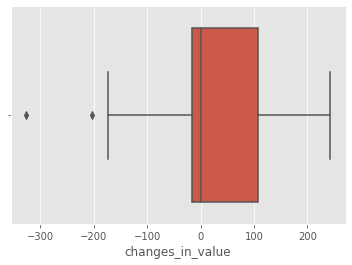

In [94]:
sns.boxplot(x=nov_nava['changes_in_value'])

<AxesSubplot:xlabel='changes_in_percent'>

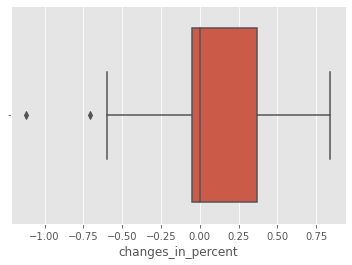

In [95]:
sns.boxplot(x=nov_nava['changes_in_percent'])

In [96]:
nov_nava.day.value_counts()

Tuesday      5
Wednesday    5
Thursday     4
Friday       4
Saturday     4
Sunday       4
Monday       4
Name: day, dtype: int64

#### December Market Update

In [97]:
dec_nava=nava.iloc[334:]
dec_nava.head()

date       day  current_value  changes_in_value  changes_in_percent
334  01/12/2022  Thursday       30380.89            179.47                0.58
335  02/12/2022    Friday       30376.49             -4.41               -0.01
336  03/12/2022  Saturday       30376.49              0.00                0.00
337  04/12/2022    Sunday       30376.49              0.00                0.00
338  05/12/2022    Monday       30468.44             91.95                0.30

In [98]:
dec_nava.describe()

current_value  changes_in_value  changes_in_percent
count      31.000000         31.000000           31.000000
mean    29928.292258        -31.540645           -0.085484
std       612.228618        270.512667            0.890542
min     28366.310000       -918.700000           -3.140000
25%     29797.100000       -102.295000           -0.340000
50%     30117.780000          0.000000            0.000000
75%     30375.570000         96.580000            0.320000
max     30656.870000        616.210000            2.170000

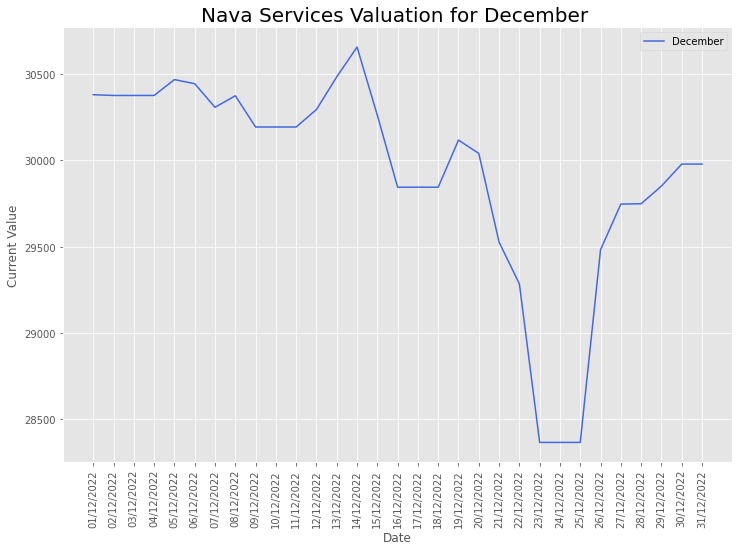

In [99]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=dec_nava["date"]
y=dec_nava["current_value"]

#plt.style.use('fivethirtyeight')
plt.plot(x,y,color='royalblue',linestyle='solid',label="December")#marker='o'dashed
#'solid', 'dashed', 'dashdot', 'dotted'
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Current Value")
plt.title('Nava Services Valuation for December ',fontsize=20)
#plt.grid()
plt.legend()
plt.show()

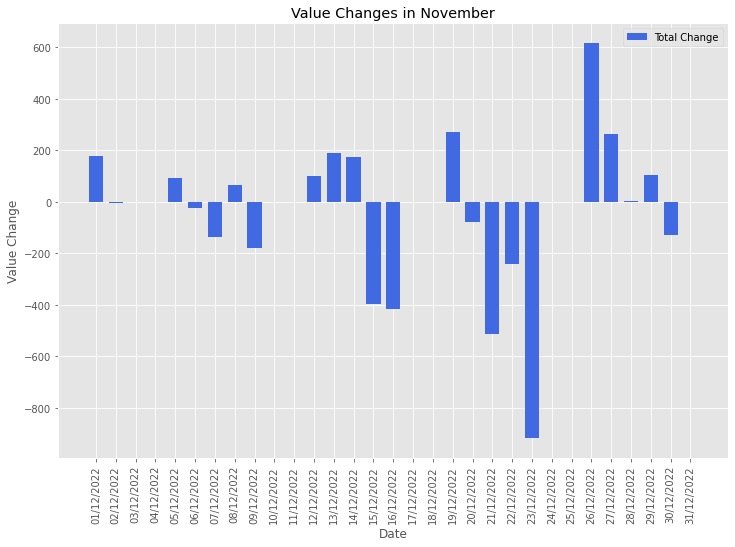

In [100]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

x=dec_nava["date"]
y=dec_nava["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="Total Change")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Value Changes in November')
plt.legend()
plt.show()

<AxesSubplot:xlabel='changes_in_value'>

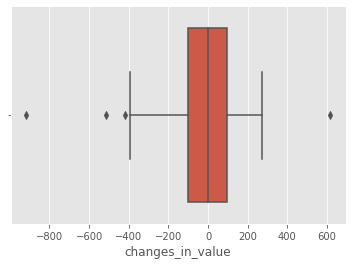

In [101]:
sns.boxplot(x=dec_nava['changes_in_value'])

<AxesSubplot:xlabel='changes_in_percent'>

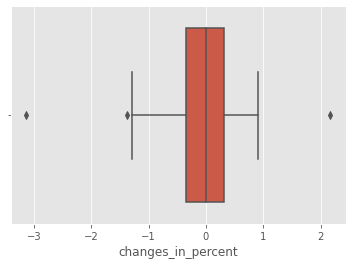

In [102]:
sns.boxplot(x=dec_nava['changes_in_percent'])

In [103]:
dec_nava.day.value_counts()

Thursday     5
Friday       5
Saturday     5
Sunday       4
Monday       4
Tuesday      4
Wednesday    4
Name: day, dtype: int64

#### Trading Days (Stock Market working days)

In [104]:
nava_working = nava[(nava['changes_in_value']!=0)]
nava_working

date        day  current_value  changes_in_value  \
2    03/01/2022     Monday       16474.40            237.16   
3    04/01/2022    Tuesday       16563.52             89.12   
4    05/01/2022  Wednesday       16691.80            128.29   
5    06/01/2022   Thursday       16632.83            -58.98   
6    07/01/2022     Friday       16702.49             69.67   
..          ...        ...            ...               ...   
359  26/12/2022     Monday       29482.52            616.21   
360  27/12/2022    Tuesday       29747.05            264.53   
361  28/12/2022  Wednesday       29749.16              2.11   
362  29/12/2022   Thursday       29851.25            102.10   
363  30/12/2022     Friday       29978.84           -127.59   

     changes_in_percent  
2                  1.46  
3                  0.54  
4                  0.77  
5                 -0.35  
6                  0.42  
..                  ...  
359                2.17  
360                0.90  
361                0.01  
362                0.34  
363               -0.42  

[248 rows x 5 columns]

In [105]:
nava_working.shape

(248, 5)

In [106]:
nava_working.count()
#quant_working.duplicated()

date                  248
day                   248
current_value         248
changes_in_value      248
changes_in_percent    248
dtype: int64

In [107]:
nava_working.describe()

current_value  changes_in_value  changes_in_percent
count     248.000000        248.000000          248.000000
mean    22904.051774          4.097258            0.014560
std      4516.249852        259.340123            1.216089
min     15655.310000       -926.590000           -5.370000
25%     19384.127500       -144.570000           -0.645000
50%     21191.790000         35.920000            0.160000
75%     27118.380000        173.150000            0.680000
max     30656.870000        631.640000            3.750000

In [108]:
nava_working['day'].value_counts()

Thursday     51
Monday       50
Friday       50
Tuesday      49
Wednesday    48
Name: day, dtype: int64

In [109]:
sns.boxplot(x=nava_working['changes_in_value'])

<AxesSubplot:xlabel='changes_in_value'>

<AxesSubplot:xlabel='changes_in_percent'>

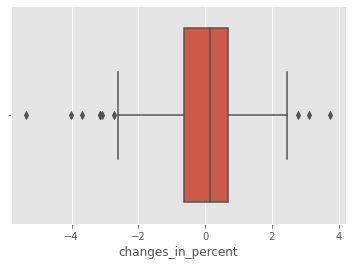

In [110]:
sns.boxplot(x=nava_working['changes_in_percent'])

#### Positive Market Changes

In [111]:
nava_plus=nava[(nava['changes_in_value']>0)]

In [112]:
nava_plus.head()

date        day  current_value  changes_in_value  changes_in_percent
2  03/01/2022     Monday       16474.40            237.16                1.46
3  04/01/2022    Tuesday       16563.52             89.12                0.54
4  05/01/2022  Wednesday       16691.80            128.29                0.77
6  07/01/2022     Friday       16702.49             69.67                0.42
9  10/01/2022     Monday       16809.20            106.70                0.64

In [113]:
nava_plus.shape

(139, 5)

In [114]:
nava_plus.count()

date                  139
day                   139
current_value         139
changes_in_value      139
changes_in_percent    139
dtype: int64

In [115]:
nava_plus['day'].value_counts()

Tuesday      30
Monday       29
Thursday     28
Wednesday    26
Friday       26
Name: day, dtype: int64

In [116]:
nava_plus.describe()

current_value  changes_in_value  changes_in_percent
count     139.000000        139.000000          139.000000
mean    23163.996475        180.095827            0.820511
std      4472.270809        133.715244            0.661015
min     16474.400000          2.110000            0.010000
25%     19683.900000         87.240000            0.340000
50%     21578.720000        165.440000            0.630000
75%     27277.210000        246.515000            1.090000
max     30656.870000        631.640000            3.750000

In [117]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=nava_plus["date"]
y=nava_plus["changes_in_value"]
plt.bar(x,y,color='green',width=0.72,label="Positive Change")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Postive Market Sessions')
plt.legend()
plt.show()

In [118]:
nava_plus['changes_in_value'].max()

631.64

In [119]:
nava.iloc[nava['changes_in_value'].idxmax()]

date                  25/02/2022
day                       Friday
current_value           17454.16
changes_in_value          631.64
changes_in_percent          3.75
Name: 55, dtype: object

#### Negative Market Changes

In [120]:
nava_minus=nava[(nava['changes_in_value']<0)]

In [121]:
nava_minus.head()

date        day  current_value  changes_in_value  changes_in_percent
5   06/01/2022   Thursday       16632.83            -58.98               -0.35
17  18/01/2022    Tuesday       16804.21           -281.92               -1.65
18  19/01/2022  Wednesday       16660.13           -144.08               -0.86
19  20/01/2022   Thursday       16582.22            -77.90               -0.47
20  21/01/2022     Friday       16311.21           -271.01               -1.63

In [122]:
nava_minus.count()

date                  109
day                   109
current_value         109
changes_in_value      109
changes_in_percent    109
dtype: int64

In [123]:
nava_minus['day'].value_counts()

Friday       24
Thursday     23
Wednesday    22
Monday       21
Tuesday      19
Name: day, dtype: int64

In [124]:
nava_minus.shape

(109, 5)

In [125]:
nava_minus.describe()

current_value  changes_in_value  changes_in_percent
count     109.000000        109.000000          109.000000
mean    22572.562661       -220.341284           -1.013211
std      4570.843911        200.668588            0.960118
min     15655.310000       -926.590000           -5.370000
25%     19122.450000       -289.730000           -1.410000
50%     20771.220000       -172.840000           -0.780000
75%     26736.660000        -59.270000           -0.260000
max     30444.410000         -0.900000            0.000000

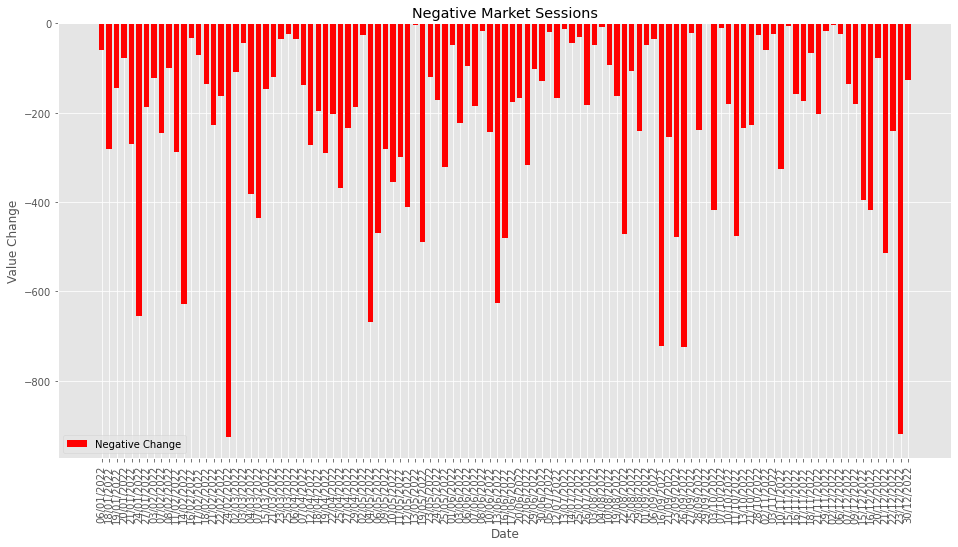

In [126]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=nava_minus["date"]
y=nava_minus["changes_in_value"]
plt.bar(x,y,color='red',width=0.72,label="Negative Change")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Negative Market Sessions')
plt.legend()
plt.show()

In [127]:
nava_minus['changes_in_value'].min()

-926.59

In [128]:
nava.iloc[nava['changes_in_value'].idxmin()]

date                  24/02/2022
day                     Thursday
current_value           16322.63
changes_in_value         -926.59
changes_in_percent         -5.37
Name: 54, dtype: object

#### Neutral Market (Stock Market Holidays)

In [129]:
nava_neutral = nava[(nava['changes_in_value']==0)]

In [130]:
nava_neutral.head()

date       day  current_value  changes_in_value  changes_in_percent
0   01/01/2022  Saturday       16237.25               0.0                 0.0
1   02/01/2022    Sunday       16237.25               0.0                 0.0
7   08/01/2022  Saturday       16702.49               0.0                 0.0
8   09/01/2022    Sunday       16702.49               0.0                 0.0
14  15/01/2022  Saturday       17030.78               0.0                 0.0

In [131]:
nava_neutral.shape

(117, 5)

In [132]:
nava_neutral.count()

date                  117
day                   117
current_value         117
changes_in_value      117
changes_in_percent    117
dtype: int64

In [133]:
nava_neutral['day'].value_counts()

Saturday     53
Sunday       52
Wednesday     4
Tuesday       3
Friday        2
Monday        2
Thursday      1
Name: day, dtype: int64

#### Trading Days (Stock Market working days)

In [134]:
nava_working = nava[(nava['changes_in_value']!=0)]
nava_working

date        day  current_value  changes_in_value  \
2    03/01/2022     Monday       16474.40            237.16   
3    04/01/2022    Tuesday       16563.52             89.12   
4    05/01/2022  Wednesday       16691.80            128.29   
5    06/01/2022   Thursday       16632.83            -58.98   
6    07/01/2022     Friday       16702.49             69.67   
..          ...        ...            ...               ...   
359  26/12/2022     Monday       29482.52            616.21   
360  27/12/2022    Tuesday       29747.05            264.53   
361  28/12/2022  Wednesday       29749.16              2.11   
362  29/12/2022   Thursday       29851.25            102.10   
363  30/12/2022     Friday       29978.84           -127.59   

     changes_in_percent  
2                  1.46  
3                  0.54  
4                  0.77  
5                 -0.35  
6                  0.42  
..                  ...  
359                2.17  
360                0.90  
361                0.01  
362                0.34  
363               -0.42  

[248 rows x 5 columns]

In [135]:
nava_working.shape

(248, 5)

In [136]:
nava_working.count()
#quant_working.duplicated()

date                  248
day                   248
current_value         248
changes_in_value      248
changes_in_percent    248
dtype: int64

In [137]:
nava_working.shape

(248, 5)

In [138]:
nava_working.count()

date                  248
day                   248
current_value         248
changes_in_value      248
changes_in_percent    248
dtype: int64

In [139]:
nava_working['day'].value_counts()

Thursday     51
Monday       50
Friday       50
Tuesday      49
Wednesday    48
Name: day, dtype: int64

In [140]:
nava_working.describe()

current_value  changes_in_value  changes_in_percent
count     248.000000        248.000000          248.000000
mean    22904.051774          4.097258            0.014560
std      4516.249852        259.340123            1.216089
min     15655.310000       -926.590000           -5.370000
25%     19384.127500       -144.570000           -0.645000
50%     21191.790000         35.920000            0.160000
75%     27118.380000        173.150000            0.680000
max     30656.870000        631.640000            3.750000

In [141]:
import plotly.graph_objects as go

labels = ['Nava Services','Trading','Positive','Negative','Neutral']
values = [nava.day.count(),nava_working.day.count(),nava_plus.day.count(),nava_minus.day.count(),nava_neutral.day.count()]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=values,
    width=[0.7, 0.7, 0.7, 0.7, 0.7], # customize width here
    name='Primary Product',
    marker_color='royalblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Nava Services performance 2022')
fig.show()

#### Nava Services Above Average

In [142]:
print(sum(nava_working.current_value))
print(len(nava_working.current_value))
nava_average=sum(nava_working.current_value)/len(nava_working.current_value)
print(nava_average)

5680204.840000003
248
22904.05177419356


In [143]:
above_avg=nava_working[(nava_working['current_value']>22904.05)]
above_avg

date        day  current_value  changes_in_value  \
205  25/07/2022     Monday       23316.48            -31.33   
206  26/07/2022    Tuesday       23133.50           -182.98   
207  27/07/2022  Wednesday       23383.87            250.38   
208  28/07/2022   Thursday       23757.50            373.97   
209  29/07/2022     Friday       24025.11            267.27   
..          ...        ...            ...               ...   
359  26/12/2022     Monday       29482.52            616.21   
360  27/12/2022    Tuesday       29747.05            264.53   
361  28/12/2022  Wednesday       29749.16              2.11   
362  29/12/2022   Thursday       29851.25            102.10   
363  30/12/2022     Friday       29978.84           -127.59   

     changes_in_percent  
205               -0.30  
206               -0.78  
207                1.08  
208                1.60  
209                1.12  
..                  ...  
359                2.17  
360                0.90  
361                0.01  
362                0.34  
363               -0.42  

[109 rows x 5 columns]

In [144]:
above_avg.shape

(109, 5)

In [145]:
above_avg.count()

date                  109
day                   109
current_value         109
changes_in_value      109
changes_in_percent    109
dtype: int64

In [146]:
above_avg['day'].value_counts()

Thursday     23
Friday       23
Tuesday      22
Monday       21
Wednesday    20
Name: day, dtype: int64

#### Nava Services Below Average

In [147]:
below_avg=nava_working[(nava_working['current_value']<22106.21)]
below_avg.head()

date        day  current_value  changes_in_value  changes_in_percent
2  03/01/2022     Monday       16474.40            237.16                1.46
3  04/01/2022    Tuesday       16563.52             89.12                0.54
4  05/01/2022  Wednesday       16691.80            128.29                0.77
5  06/01/2022   Thursday       16632.83            -58.98               -0.35
6  07/01/2022     Friday       16702.49             69.67                0.42

In [148]:
below_avg.shape

(137, 5)

In [149]:
below_avg.count()

date                  137
day                   137
current_value         137
changes_in_value      137
changes_in_percent    137
dtype: int64

In [150]:
below_avg['day'].value_counts()

Monday       29
Wednesday    28
Tuesday      27
Thursday     27
Friday       26
Name: day, dtype: int64

### Day-Wise Stats
#### Saturday 

In [151]:
saturday=nava[nava.day=='Saturday']
saturday.head()

date       day  current_value  changes_in_value  changes_in_percent
0   01/01/2022  Saturday       16237.25               0.0                 0.0
7   08/01/2022  Saturday       16702.49               0.0                 0.0
14  15/01/2022  Saturday       17030.78               0.0                 0.0
21  22/01/2022  Saturday       16311.21               0.0                 0.0
28  29/01/2022  Saturday       16711.87               0.0                 0.0

In [152]:
saturday.shape

(53, 5)

In [153]:
saturday.day.count()

53

In [154]:
saturday.describe()

current_value  changes_in_value  changes_in_percent
count      53.000000              53.0                53.0
mean    22871.859811               0.0                 0.0
std      4528.074735               0.0                 0.0
min     16237.250000               0.0                 0.0
25%     19611.760000               0.0                 0.0
50%     21204.980000               0.0                 0.0
75%     26996.390000               0.0                 0.0
max     30376.490000               0.0                 0.0

#### Sunday

In [155]:
sunday=nava[nava.day=='Sunday']
sunday.head()

date     day  current_value  changes_in_value  changes_in_percent
1   02/01/2022  Sunday       16237.25               0.0                 0.0
8   09/01/2022  Sunday       16702.49               0.0                 0.0
15  16/01/2022  Sunday       17030.78               0.0                 0.0
22  23/01/2022  Sunday       16311.21               0.0                 0.0
29  30/01/2022  Sunday       16711.87               0.0                 0.0

In [156]:
sunday.shape

(52, 5)

In [157]:
sunday.day.count()

52

In [158]:
sunday.describe()

current_value  changes_in_value  changes_in_percent
count      52.000000              52.0                52.0
mean    22735.187115               0.0                 0.0
std      4460.500861               0.0                 0.0
min     16237.250000               0.0                 0.0
25%     19494.677500               0.0                 0.0
50%     21107.100000               0.0                 0.0
75%     26892.755000               0.0                 0.0
max     30376.490000               0.0                 0.0

#### Monday

In [159]:
monday=nava_working[nava_working.day=='Monday']
monday.head()

date     day  current_value  changes_in_value  changes_in_percent
2   03/01/2022  Monday       16474.40            237.16                1.46
9   10/01/2022  Monday       16809.20            106.70                0.64
16  17/01/2022  Monday       17086.13             55.35                0.32
23  24/01/2022  Monday       15655.31           -655.90               -4.02
30  31/01/2022  Monday       16932.01            220.14                1.32

In [160]:
monday.shape

(50, 5)

In [161]:
monday.day.count()

50

In [162]:
monday.describe()

current_value  changes_in_value  changes_in_percent
count      50.000000         50.000000           50.000000
mean    22628.272800        -15.010400           -0.127200
std      4569.248373        302.559782            1.442414
min     15655.310000       -724.390000           -4.020000
25%     19279.202500       -201.107500           -0.907500
50%     20957.060000         53.350000            0.240000
75%     26976.440000        191.657500            0.885000
max     30468.440000        616.210000            2.170000

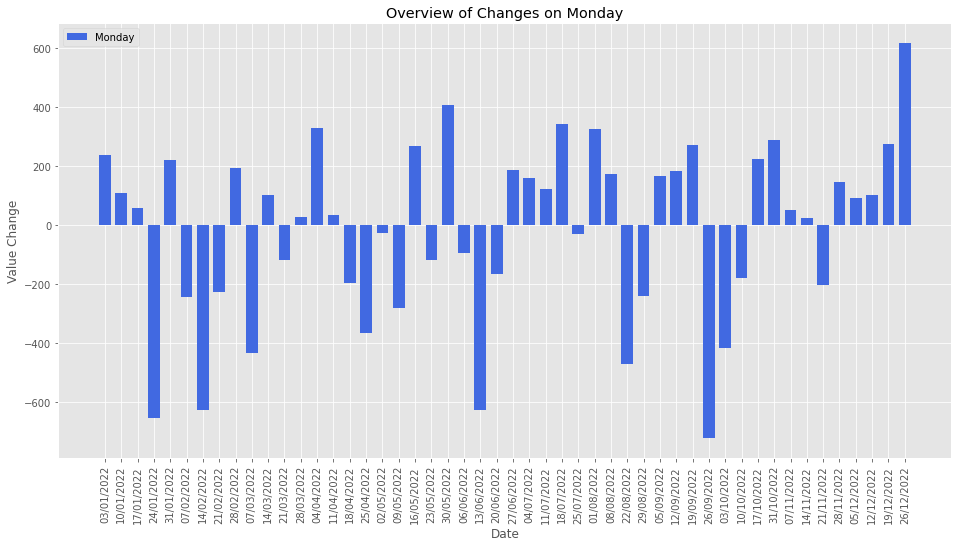

In [163]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=monday["date"]
y=monday["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="Monday")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Overview of Changes on Monday')
plt.legend()
plt.show()

In [164]:
mon=round(monday[('changes_in_value')].mean(), 2)
mon

-15.01

#### Tuesday

In [165]:
tuesday=nava_working[nava_working.day=='Tuesday']
tuesday.head()

date      day  current_value  changes_in_value  changes_in_percent
3   04/01/2022  Tuesday       16563.52             89.12                0.54
10  11/01/2022  Tuesday       16847.38             38.18                0.23
17  18/01/2022  Tuesday       16804.21           -281.92               -1.65
24  25/01/2022  Tuesday       16831.91            176.50                1.06
31  01/02/2022  Tuesday       17204.97            272.96                1.61

In [166]:
tuesday.shape

(49, 5)

In [167]:
tuesday.day.count()

49

In [168]:
tuesday.describe()

current_value  changes_in_value  changes_in_percent
count      49.000000         49.000000           49.000000
mean    22970.311633         73.397143            0.324898
std      4603.373116        241.260764            1.139401
min     16563.520000       -475.230000           -1.790000
25%     19473.740000        -77.000000           -0.260000
50%     20930.990000         58.610000            0.250000
75%     27312.630000        207.690000            0.850000
max     30484.570000        620.290000            3.100000

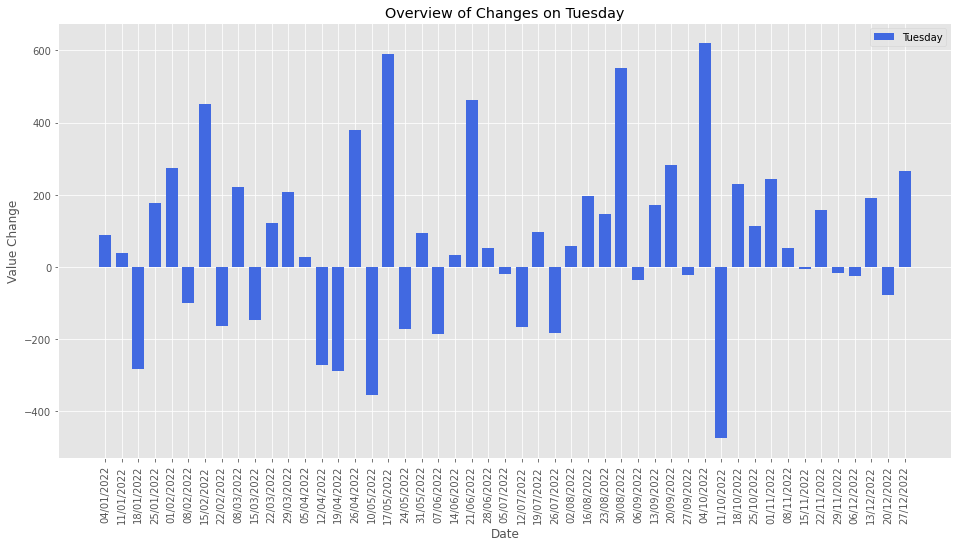

In [169]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=tuesday["date"]
y=tuesday["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="Tuesday")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Overview of Changes on Tuesday')
plt.legend()
plt.show()

In [170]:
tue=round(tuesday[('changes_in_value')].mean(), 2)
tue

73.4

#### Wednesday

In [171]:
wednesday=nava_working[nava_working.day=='Wednesday']
wednesday.head()

date        day  current_value  changes_in_value  changes_in_percent
4   05/01/2022  Wednesday       16691.80            128.29                0.77
11  12/01/2022  Wednesday       16873.56             26.18                0.16
18  19/01/2022  Wednesday       16660.13           -144.08               -0.86
32  02/02/2022  Wednesday       17456.58            251.61                1.46
39  09/02/2022  Wednesday       17193.85            203.61                1.20

In [172]:
wednesday.shape

(48, 5)

In [173]:
wednesday.day.count()

48

In [174]:
wednesday.describe()

current_value  changes_in_value  changes_in_percent
count      48.000000         48.000000           48.000000
mean    22792.805208         -4.090208            0.011479
std      4453.123871        211.184708            0.960864
min     16660.130000       -668.910000           -3.160000
25%     19343.190000       -104.150000           -0.460000
50%     21014.920000          5.805000            0.020500
75%     27000.660000        150.917500            0.562500
max     30656.870000        374.770000            2.040000

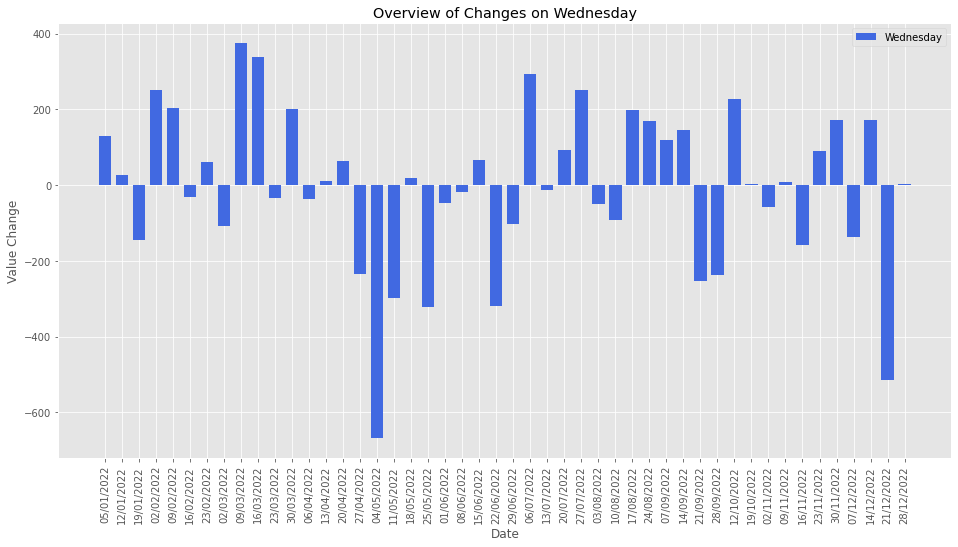

In [175]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=wednesday["date"]
y=wednesday["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="Wednesday")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Overview of Changes on Wednesday')
plt.legend()
plt.show()

#### Thursday

In [176]:
thursday=nava_working[nava_working.day=='Thursday']
thursday.head()

date       day  current_value  changes_in_value  changes_in_percent
5   06/01/2022  Thursday       16632.83            -58.98               -0.35
12  13/01/2022  Thursday       16927.34             53.78                0.32
19  20/01/2022  Thursday       16582.22            -77.90               -0.47
26  27/01/2022  Thursday       16644.88           -187.04               -1.11
33  03/02/2022  Thursday       17333.10           -123.48               -0.71

In [177]:
thursday.shape

(51, 5)

In [178]:
thursday.day.count()

51

In [179]:
thursday.describe()

current_value  changes_in_value  changes_in_percent
count      51.000000         51.000000           51.000000
mean    23033.963529         -6.579216           -0.057843
std      4577.037183        243.213158            1.209106
min     16322.630000       -926.590000           -5.370000
25%     19328.880000       -114.840000           -0.535000
50%     21357.000000         43.940000            0.160000
75%     27266.455000        156.375000            0.605000
max     30380.890000        373.970000            1.710000

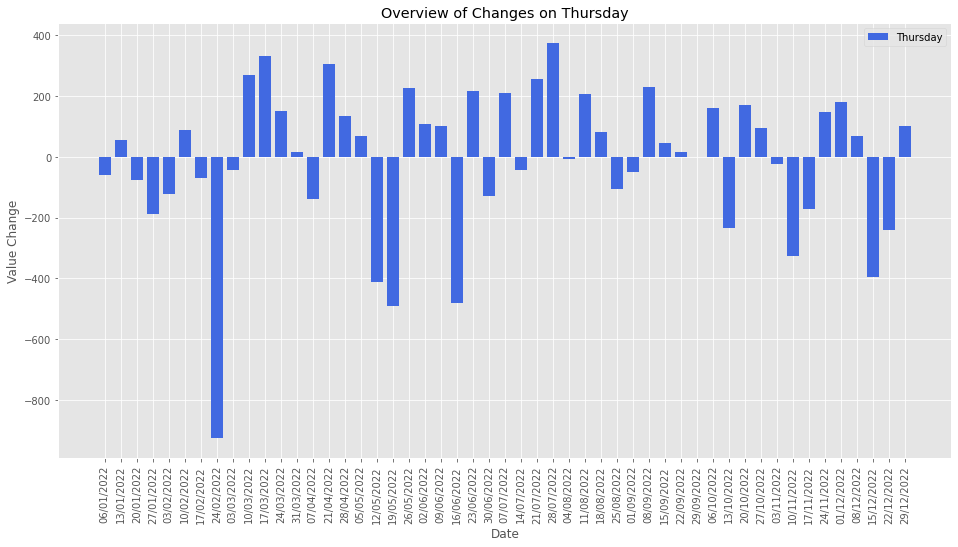

In [180]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=thursday["date"]
y=thursday["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="Thursday")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Overview of Changes on Thursday')
plt.legend()
plt.show()

#### Friday

In [181]:
friday=nava_working[nava_working.day=='Friday']
friday.head()

date     day  current_value  changes_in_value  changes_in_percent
6   07/01/2022  Friday       16702.49             69.67                0.42
13  14/01/2022  Friday       17030.78            103.44                0.61
20  21/01/2022  Friday       16311.21           -271.01               -1.63
27  28/01/2022  Friday       16711.87             66.99                0.40
34  04/02/2022  Friday       17336.29              3.19                0.02

In [182]:
friday.shape

(50, 5)

In [183]:
friday.day.count()

50

In [184]:
friday.describe()

current_value  changes_in_value  changes_in_percent
count      50.000000         50.000000           50.000000
mean    23089.182800        -25.959000           -0.071000
std      4542.476645        284.694234            1.263063
min     16311.210000       -918.700000           -3.140000
25%     19613.427500       -185.150000           -0.860000
50%     21484.405000         14.830000            0.060000
75%     27029.135000        148.072500            0.602500
max     30376.490000        631.640000            3.750000

In [185]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(16,8)

x=friday["date"]
y=friday["changes_in_value"]
plt.bar(x,y,color='royalblue',width=0.72,label="Friday")

plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Value Change")
plt.title('Overview of Changes on Friday')
plt.legend()
plt.show()

In [186]:
nava['day'].value_counts()

Saturday     53
Sunday       52
Monday       52
Tuesday      52
Wednesday    52
Thursday     52
Friday       52
Name: day, dtype: int64

In [187]:
import plotly.graph_objects as go

labels = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
values = [saturday.day.count(),sunday.day.count(),monday.day.count(),tuesday.day.count(),wednesday.day.count(),thursday.day.count(),friday.day.count()]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=values,
    width=[0.7, 0.7, 0.7, 0.7, 0.7,0.7,0.7], # customize width here
    name='Primary Product',
    marker_color='darkorange'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Day count 2022')
fig.show()

### Profit Percentage Probability
#### Monday Profit %

In [188]:
monday_plus=len(nava_plus[nava_plus.day=='Monday'])
print(monday_plus)

total_monday=len(nava_working[nava_working.day=='Monday'])
print(total_monday)

29
50


In [189]:
Monday_Profit_Percentage=round((monday_plus/total_monday)*100,2)
Monday_Profit_Percentage

58.0

#### Tuesday Profit %

In [190]:
tuesday_plus=len(nava_plus[nava_plus.day=='Tuesday'])
print(tuesday_plus)

total_tuesday=len(nava_working[nava_working.day=='Tuesday'])
print(total_tuesday)

30
49


In [191]:
Tuesday_Profit_Percentage=round((tuesday_plus/total_tuesday)*100,2)
Tuesday_Profit_Percentage

61.22

#### Wednesday Profit %

In [192]:
wednesday_plus=len(nava_plus[nava_plus.day=='Wednesday'])
print(wednesday_plus)

total_wednesday=len(nava_working[nava_working.day=='Wednesday'])
print(total_wednesday)

26
48


In [193]:
Wednesday_Profit_Percentage=round((wednesday_plus/total_wednesday)*100,2)
Wednesday_Profit_Percentage

54.17

#### Thursday Profit %

In [194]:
thursday_plus=len(nava_plus[nava_plus.day=='Thursday'])
print(thursday_plus)

total_thursday=len(nava_working[nava_working.day=='Thursday'])
print(total_thursday)

28
51


In [195]:
Thursday_Profit_Percentage=round((thursday_plus/total_thursday)*100,2)
Thursday_Profit_Percentage

54.9

#### Friday Profit %

In [196]:
friday_plus=len(nava_plus[nava_plus.day=='Friday'])
print(friday_plus)

total_friday=len(nava_working[nava_working.day=='Friday'])
print(total_friday)

26
50


In [197]:
Friday_Profit_Percentage=round((friday_plus/total_friday)*100,2)
Friday_Profit_Percentage

52.0

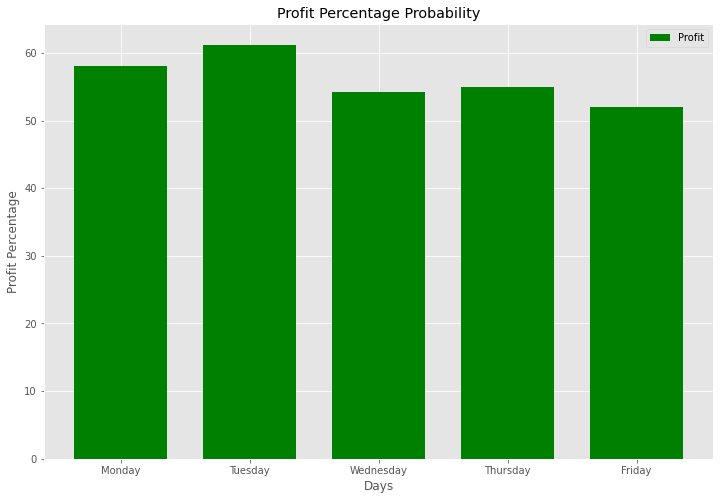

In [198]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Profit_Percentage,Tuesday_Profit_Percentage,Wednesday_Profit_Percentage,
          Thursday_Profit_Percentage,Friday_Profit_Percentage]

plt.bar(labels,values,color='green',width=0.72,label="Profit")

plt.xlabel("Days")
plt.ylabel("Profit Percentage")
plt.title('Profit Percentage Probability')
plt.legend()
plt.show()


In [199]:
import plotly.graph_objects as go
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Profit_Percentage,Tuesday_Profit_Percentage,Wednesday_Profit_Percentage,
          Thursday_Profit_Percentage,Friday_Profit_Percentage]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=values,
    width=[0.6, 0.6, 0.6, 0.6, 0.6], # customize width here
    name='Primary Product',
    marker_color='green'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Nava Services Profit Percentage Probability')
fig.show()

In [200]:
import plotly.graph_objects as go

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Profit_Percentage,Tuesday_Profit_Percentage,Wednesday_Profit_Percentage,
          Thursday_Profit_Percentage,Friday_Profit_Percentage]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Nava Services Profit Percentage Probability')

fig.show()

### Loss Percentage Probability

#### Monday  Loss %

In [201]:
monday_minus=len(nava_minus[nava_minus.day=='Monday'])
print(monday_minus)

total_monday=len(nava_working[nava_working.day=='Monday'])
print(total_monday)

21
50


In [202]:
Monday_Loss_Percentage=round((monday_minus/total_monday)*100,2)
Monday_Loss_Percentage

42.0

#### Tuesday  Loss %

In [203]:
tuesday_minus=len(nava_minus[nava_minus.day=='Tuesday'])
print(tuesday_minus)

total_tuesday=len(nava_working[nava_working.day=='Tuesday'])
print(total_tuesday)

19
49


In [204]:
Tuesday_Loss_Percentage=round((tuesday_minus/total_tuesday)*100,2)
Tuesday_Loss_Percentage

38.78

#### Wednesday Loss %

In [205]:
wednesday_minus=len(nava_minus[nava_minus.day=='Wednesday'])
print(wednesday_minus)

total_wednesday=len(nava_working[nava_working.day=='Wednesday'])
print(total_wednesday)

22
48


In [206]:
Wednesday_Loss_Percentage=round((wednesday_minus/total_wednesday)*100,2)
Wednesday_Loss_Percentage

45.83

#### Thursday Loss %

In [207]:
thursday_minus=len(nava_minus[nava_minus.day=='Thursday'])
print(thursday_minus)

total_thursday=len(nava_working[nava_working.day=='Thursday'])
print(total_thursday)

23
51


In [208]:
Thursday_Loss_Percentage=round((thursday_minus/total_thursday)*100,2)
Thursday_Loss_Percentage

45.1

#### Friday Loss %

In [209]:
friday_minus=len(nava_minus[nava_minus.day=='Friday'])
print(friday_minus)

total_friday=len(nava_working[nava_working.day=='Friday'])
print(total_friday)

24
50


In [210]:
Friday_Loss_Percentage=round((friday_minus/total_friday)*100,2)
Friday_Loss_Percentage

48.0

In [211]:
# Import Libraries
import matplotlib.pyplot as plt

# Create figure
fig = plt.figure()

# Figure size
fig.set_size_inches(12,8)

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Loss_Percentage,Tuesday_Loss_Percentage,Wednesday_Loss_Percentage,
          Thursday_Loss_Percentage,Friday_Loss_Percentage]

plt.bar(labels,values,color='red',width=0.72,label="Loss")

plt.xlabel("Days")
plt.ylabel("Loss Percentage")
plt.title('Loss Percentage Probability')
plt.legend()
plt.show()

In [212]:
import plotly.graph_objects as go
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Loss_Percentage,Tuesday_Loss_Percentage,Wednesday_Loss_Percentage,
          Thursday_Loss_Percentage,Friday_Loss_Percentage]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=values,
    width=[0.6, 0.6, 0.6, 0.6, 0.6], # customize width here
    name='Primary Product',
    marker_color='red'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Nava Services Loss Percentage Probability')
fig.show()

In [213]:




import plotly.graph_objects as go

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
values = [Monday_Loss_Percentage,Tuesday_Loss_Percentage,Wednesday_Loss_Percentage,
          Thursday_Loss_Percentage,Friday_Loss_Percentage]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Nava Services Loss Percentage Probability')

fig.show()

In [214]:
import plotly.graph_objects as go

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday']
profit_values = [Monday_Profit_Percentage,Tuesday_Profit_Percentage,Wednesday_Profit_Percentage,
          Thursday_Profit_Percentage,Friday_Profit_Percentage]
loss_values = [Monday_Loss_Percentage,Tuesday_Loss_Percentage,Wednesday_Loss_Percentage,
          Thursday_Loss_Percentage,Friday_Loss_Percentage]
fig = go.Figure()
fig.add_trace(go.Bar(
    x=labels,
    y=profit_values,
    name='Profit',
    marker_color='green'
))

fig.add_trace(go.Bar(
    x=labels,
    y=loss_values,
    name='Loss',
    marker_color='red'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
 
fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="black"
)

fig.update_layout(title_text='Day Wise Performance of Nava Services')

fig.show()
